<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture16b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computational Physics
###Lecture 16b
Neural Networks and representation

In [1]:
pip install mnist

In [33]:
import numpy as np
import mnist
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import os
import pickle
import matplotlib.pyplot as plt

In [8]:
#You need to mount google drive to your Colab session.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


 check your path is correct


In [ ]:
ls gdrive/MyDrive/Colab\ Notebooks

Run the cells below for download_mnist() at the start of the lecture. Will take some time to load.

In [26]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
def download_mnist():
  train_images = mnist.train_images()
  train_labels = mnist.train_labels()
  test_images = mnist.test_images()
  test_labels = mnist.test_labels()
  return train_images, train_labels, test_images, test_labels


In [30]:
download = False
if download:
  train_images, train_labels, test_images, test_labels = download_mnist()
  mnist_data = [train_images, train_labels, test_images, test_labels]
  with open('mnist.pkl', 'wb') as f:
    pickle.dump(mnist_data, f)
else:
  with open('mnist.pkl', 'rb') as f:
    mnist_data = pickle.load(f)
  train_images, train_labels, test_images, test_labels = mnist_data

In [35]:
print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


Display for first ten entries in train_images 

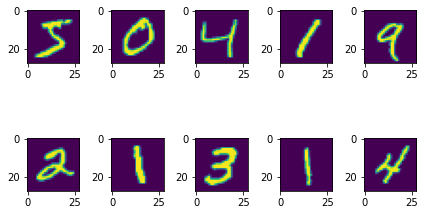

In [36]:
for i in np.arange(10): 
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i])
plt.tight_layout()
plt.show()

## Process the image data:

In [37]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


## Create a NN Model:

In [38]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

The optimizer. We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers you can look into as well.
The loss function. Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter. 
Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

In [39]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

## Model fit:

In [92]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0617 - accuracy: 0.9798
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0584 - accuracy: 0.9801
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.9822
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - accuracy: 0.9827
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9833
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9845
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0458 - accuracy: 0.9845
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9855
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.040

In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

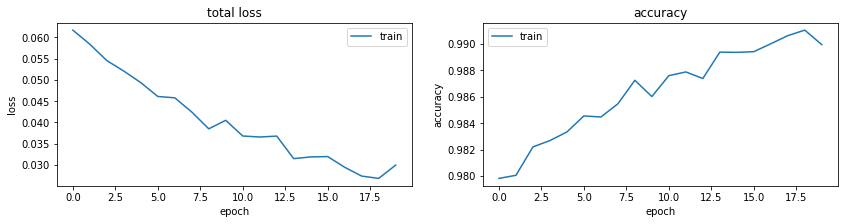

In [94]:
f, ax = plt.subplots(1, 2)
f.set_figwidth(14)
f.set_figheight(3)
ax[0].plot(history.history['loss'])
ax[0].set_title('total loss')
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].legend(['train'], loc='best')

ax[1].plot(history.history[list(history.history.keys())[1]])
ax[1].set_title('accuracy')
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].legend(['train'], loc='best')

plt.show()

## NN model predictions:

In [95]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9675


[0.15746115148067474, 0.9674999713897705]

In [96]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]


## QUESTIONS:
- Explore statistics for the accuracy of the model for a large number of runs 
- Try GPUs
- Experiment with model fitting parametersL batch size, number of epocks
- Experiment with the architecture then check the results
- Add a validation set to the model.fit() function

## Visualize hidden layers

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Access layers' weights with:
model.layers[0].get_weights()

Consider the below code:

(784, 64)


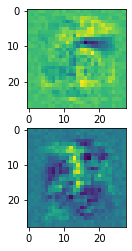

In [114]:
n = 0 #layer number
hidden_n = model.layers[n].get_weights()[0]
print(hidden_n.shape)
target = 11 #get weights for 11th output in this layer
hidden_digit = hidden_n[:,target].reshape((28,28)) #wrap weights to form a 2D matrix

target = 12 #get weights for 11th output in this layer
hidden_digit2 = hidden_n[:,target].reshape((28,28)) #wrap weights to form a 2D matrix

plt.subplot(2,1,1)
plt.imshow(hidden_digit)
plt.subplot(2,1,2)
plt.imshow(hidden_digit2)
plt.show()

### Questions
- Plot several more images of the hidden layers for several hidden layers
- Comment on the representation learned in the neural network